### 1. Kiểm tra tính stationary

- **Augmented Dickey-Fuller (ADF) Test**: Kiểm tra liệu dữ liệu có phải là stationary hay không.
- **Kết quả cần chú ý**: Test Statistic, p-value, và Critical Values.

### 2. Phân tích thành phần thời gian

- **Seasonal Decomposition**: Phân tích dữ liệu thành các thành phần trend, seasonal, và residual.
- **Kết quả cần chú ý**: Trend, Seasonal, Residual.

### 3. Kiểm tra và xử lý outliers

- **Boxplot**: Để xác định các giá trị bất thường (outliers).
- **Kết quả cần chú ý**: Các giá trị vượt ngoài phạm vi bình thường.

### 4. Tính toán các chỉ số thống kê

- **Trung bình (Mean)**: Để hiểu giá trị trung bình của dữ liệu.
- **Trung vị (Median)**: Để hiểu giá trị trung bình khi dữ liệu bị skewed.
- **Độ lệch chuẩn (Standard Deviation)**: Để đo lường mức độ phân tán của dữ liệu.
- **Tối đa (Max) và Tối thiểu (Min)**: Để xác định phạm vi của dữ liệu.

### 5. Phân tích xu hướng và mùa vụ

- **Rolling Mean và Rolling Standard Deviation**: Để hiểu xu hướng và biến động của dữ liệu theo thời gian.
- **Kết quả cần chú ý**: Rolling Mean, Rolling Standard Deviation.

### 6. Kiểm tra và xử lý thiếu dữ liệu

- **Kiểm tra thiếu dữ liệu**: Xác định xem có giá trị nào bị thiếu không.
- **Điền giá trị thiếu**: Sử dụng phương pháp như nội suy (interpolation), điền giá trị trung bình, hoặc phương pháp gần nhất (forward fill).

### 7. Chuẩn hóa và biến đổi dữ liệu

- **Chuẩn hóa Min-Max**: Chuyển đổi dữ liệu vào khoảng từ 0 đến 1.
- **Chuẩn hóa Z-score**: Điều chỉnh dữ liệu để có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.
- **Differencing**: Để làm cho dữ liệu trở nên stationary.
- **Lag Features**: Tạo các đặc trưng thời gian lag để mô hình học được mối quan hệ thời gian.

### 8. Phân tích tự tương quan (Autocorrelation)

- **Autocorrelation Function (ACF)**: Để xác định các mẫu tự tương quan trong dữ liệu.
- **Partial Autocorrelation Function (PACF)**: Để xác định mối quan hệ giữa một quan sát với các quan sát trước đó khi loại bỏ các ảnh hưởng của các quan sát ở giữa.

### 9. Phân tích chuỗi thời gian nâng cao

- **Fourier Transform**: Để phân tích tần số của dữ liệu time series.
- **Wavelet Transform**: Để phân tích các thành phần tần số theo thời gian.

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:
# Đọc dữ liệu
file_path = 'D:\\TSA\\HPG Historical Data.csv'
data = pd.read_csv(file_path)

# Chuyển đổi cột Date sang datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Loại bỏ ký tự và chuyển đổi kiểu dữ liệu
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)
data['Vol.'] = data['Vol.'].str.replace('M', '').str.replace(',', '').astype(float)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']] = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']])

# Hiển thị thông tin dữ liệu sau khi xử lý
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1308 non-null   datetime64[ns]
 1   Price     1308 non-null   float64       
 2   Open      1308 non-null   float64       
 3   High      1308 non-null   float64       
 4   Low       1308 non-null   float64       
 5   Vol.      1308 non-null   float64       
 6   Change %  1308 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 71.7 KB


(None,
         Date     Price      Open      High       Low      Vol.  Change %
 0 2023-03-31  0.315130  0.322774  0.310724  0.315346  0.214770  0.502152
 1 2023-03-30  0.315130  0.327707  0.316933  0.325307  0.185607  0.502152
 2 2023-03-29  0.315130  0.320307  0.315702  0.324049  0.154468  0.536585
 3 2023-03-28  0.312636  0.325240  0.313213  0.324049  0.096331  0.467719
 4 2023-03-27  0.315130  0.312908  0.310724  0.315346  0.178457  0.642755)

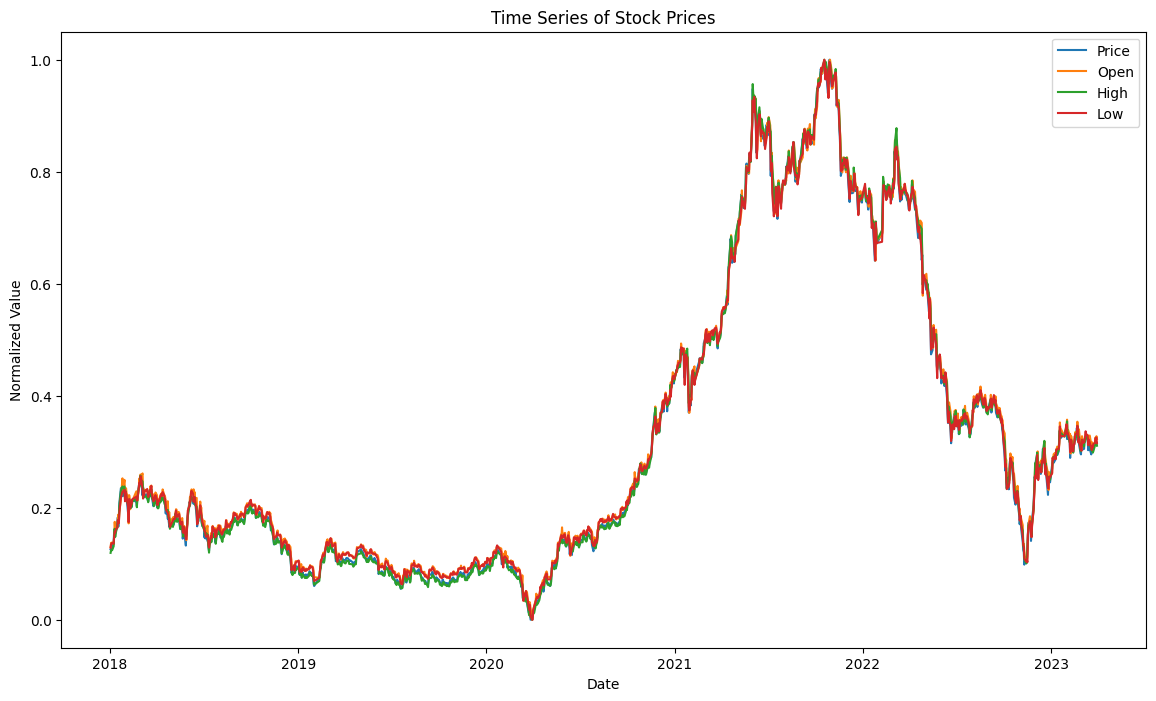

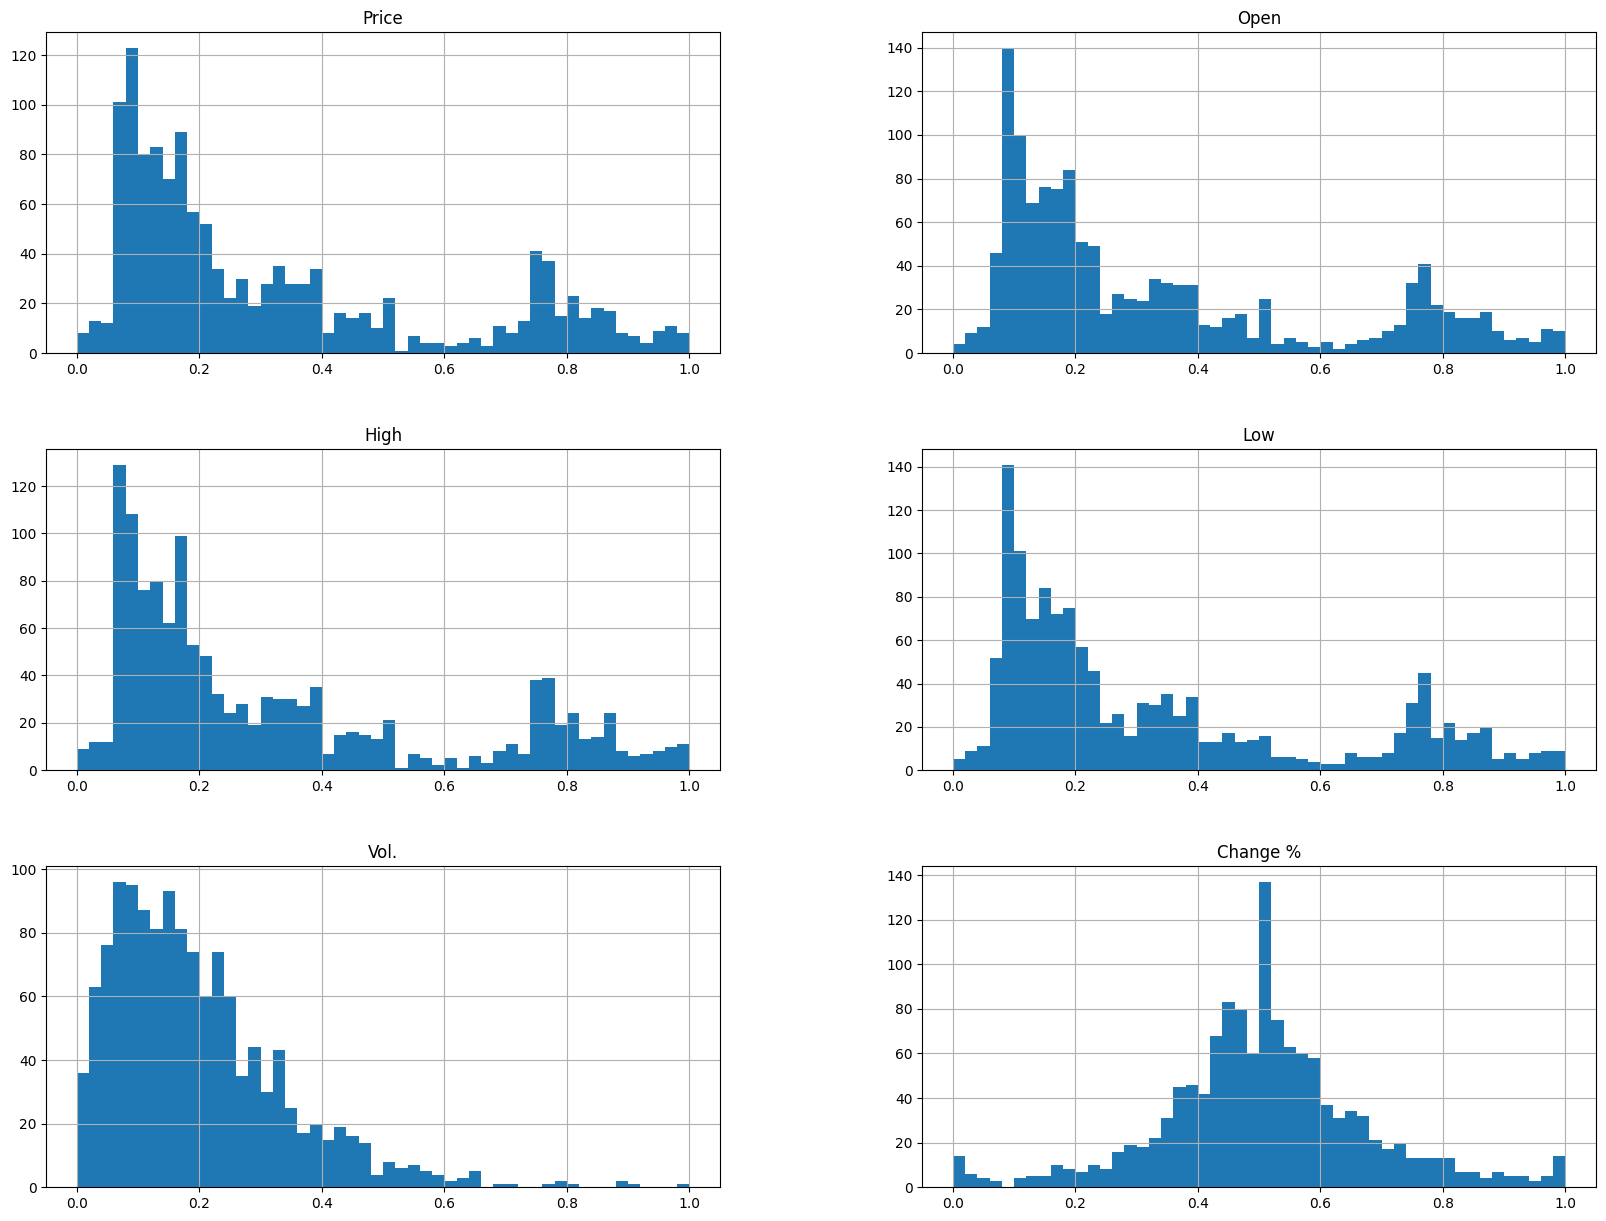

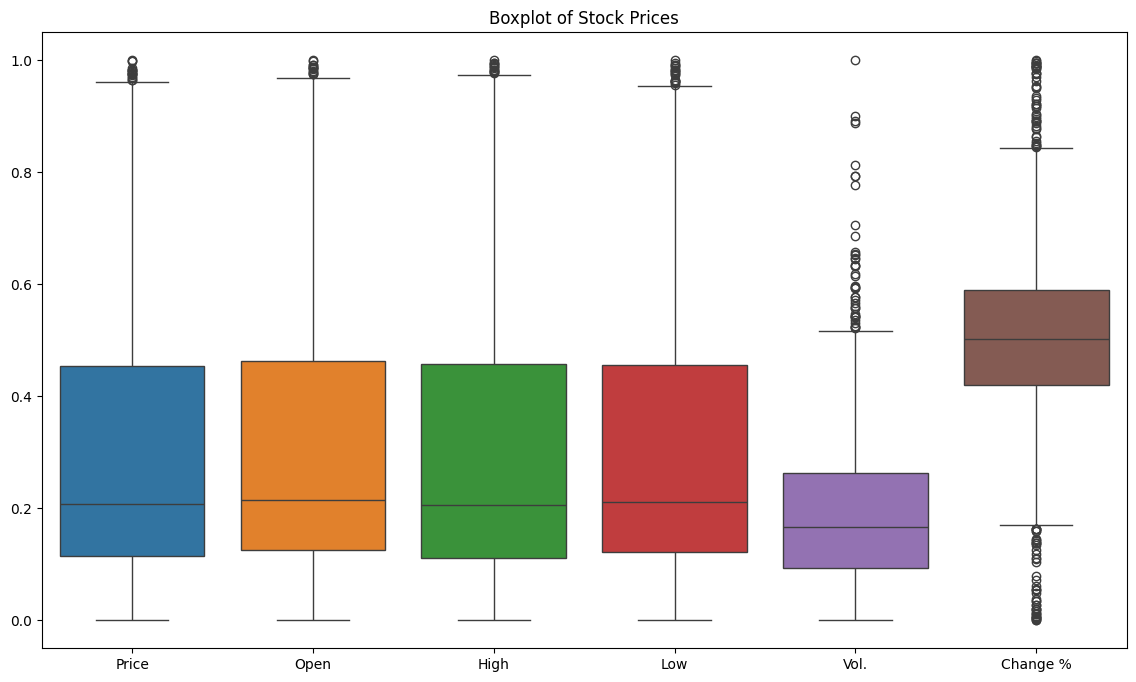

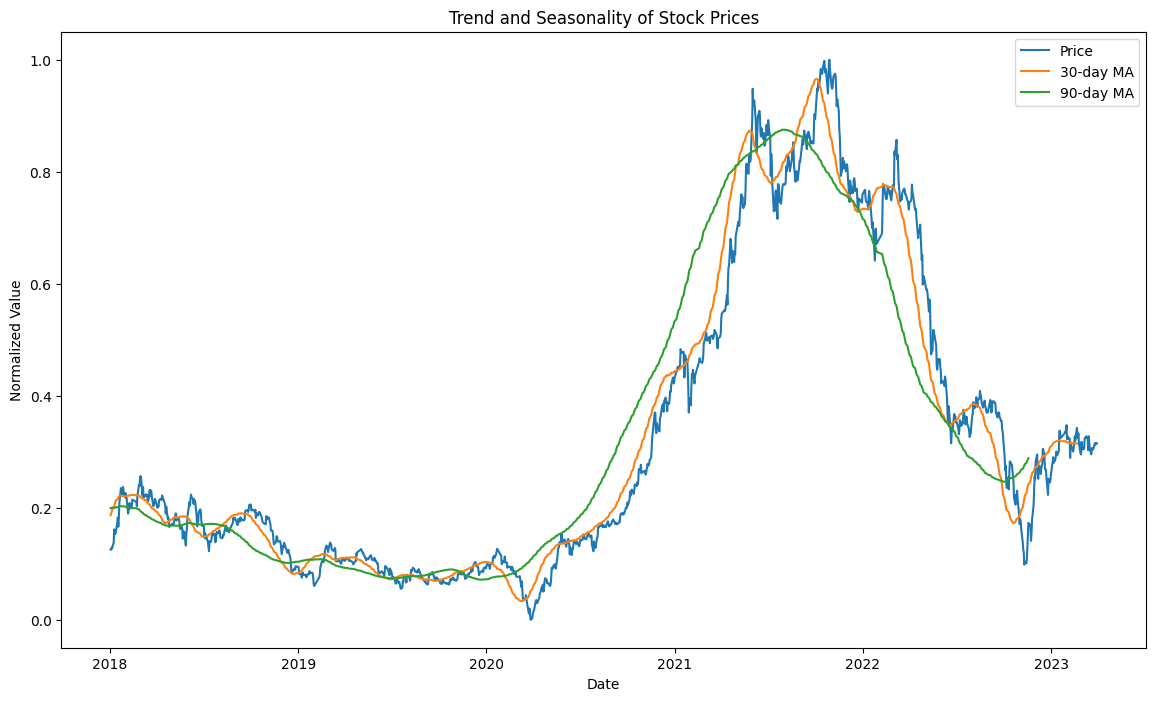

(Date        0
 Price       0
 Open        0
 High        0
 Low         0
 Vol.        0
 Change %    0
 dtype: int64,
                                 Date        Price         Open         High  \
 count                           1308  1308.000000  1308.000000  1308.000000   
 mean   2020-08-18 12:58:20.917431296     0.324452     0.332327     0.325546   
 min              2018-01-02 00:00:00     0.000000     0.000000     0.000000   
 25%              2019-05-05 06:00:00     0.114935     0.125052     0.112043   
 50%              2020-08-18 12:00:00     0.206817     0.215329     0.206330   
 75%              2021-12-06 06:00:00     0.454775     0.462952     0.456775   
 max              2023-03-31 00:00:00     1.000000     1.000000     1.000000   
 std                              NaN     0.268084     0.265877     0.271602   
 
                Low         Vol.     Change %  
 count  1308.000000  1308.000000  1308.000000  
 mean      0.328669     0.196930     0.506763  
 min       0.0

In [13]:
# 1. Đánh giá sơ bộ dữ liệu
# a. Kiểm tra dữ liệu
# Kiểm tra thiếu dữ liệu
missing_data = data.isnull().sum()

# Phân tích thống kê cơ bản
data_describe = data.describe()

# Visualization
# Biểu đồ đường thời gian cho các cột giá trị
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Price'], label='Price')
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.title('Time Series of Stock Prices')
plt.show()

# Histogram cho các cột giá trị
data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].hist(bins=50, figsize=(20, 15))
plt.show()

# Kiểm tra ngoại lệ sử dụng boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']])
plt.title('Boxplot of Stock Prices')
plt.show()

# b. Tính toán các chỉ số
# Tính trung bình trượt
data['Price_MA30'] = data['Price'].rolling(window=30).mean()
data['Price_MA90'] = data['Price'].rolling(window=90).mean()

# Tính độ lệch chuẩn trượt
data['Price_STD30'] = data['Price'].rolling(window=30).std()
data['Price_STD90'] = data['Price'].rolling(window=90).std()

# Biểu đồ xu hướng và mùa vụ
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Price'], label='Price')
plt.plot(data['Date'], data['Price_MA30'], label='30-day MA')
plt.plot(data['Date'], data['Price_MA90'], label='90-day MA')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.title('Trend and Seasonality of Stock Prices')
plt.show()

# Hiển thị thông tin đã phân tích
missing_data, data_describe, data[['Date', 'Price', 'Price_MA30', 'Price_MA90', 'Price_STD30', 'Price_STD90']].head()


## Kiểm tra tính stationary

In [14]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Kiểm tra tính stationary của cột Price
test_stationarity(data['Price'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.059238
p-value                           0.731051
#Lags Used                       15.000000
Number of Observations Used    1292.000000
Critical Value (1%)              -3.435421
Critical Value (5%)              -2.863780
Critical Value (10%)             -2.567962
dtype: float64


Từ kết quả cho thấy giá trị Test Statistic lớn hơn giá trị Critical Value ở mức 1%, 5%, và 10%, và p-value lớn hơn 0.05, điều này cho thấy dữ liệu không phải là stationary. Do đó, chúng ta có thể cần phải xử lý thêm để làm cho dữ liệu trở nên stationary, tôi sẽ xử dụng phương phấp differencing

In [15]:
# Lấy sự khác biệt của dữ liệu
data['Price_diff'] = data['Price'].diff().dropna()

# Kiểm tra lại tính stationary sau khi lấy sự khác biệt
stationarity_results_diff = test_stationarity(data['Price_diff'].dropna())
stationarity_results_diff

Results of Dickey-Fuller Test:
Test Statistic                -7.524347e+00
p-value                        3.718738e-11
#Lags Used                     1.400000e+01
Number of Observations Used    1.292000e+03
Critical Value (1%)           -3.435421e+00
Critical Value (5%)           -2.863780e+00
Critical Value (10%)          -2.567962e+00
dtype: float64


Kết quả cho thấy giá trị Test Statistic nhỏ hơn giá trị Critical Value ở mức 1%, 5%, và 10%, và p-value nhỏ hơn 0.05, điều này cho thấy dữ liệu đã trở nên stationary.

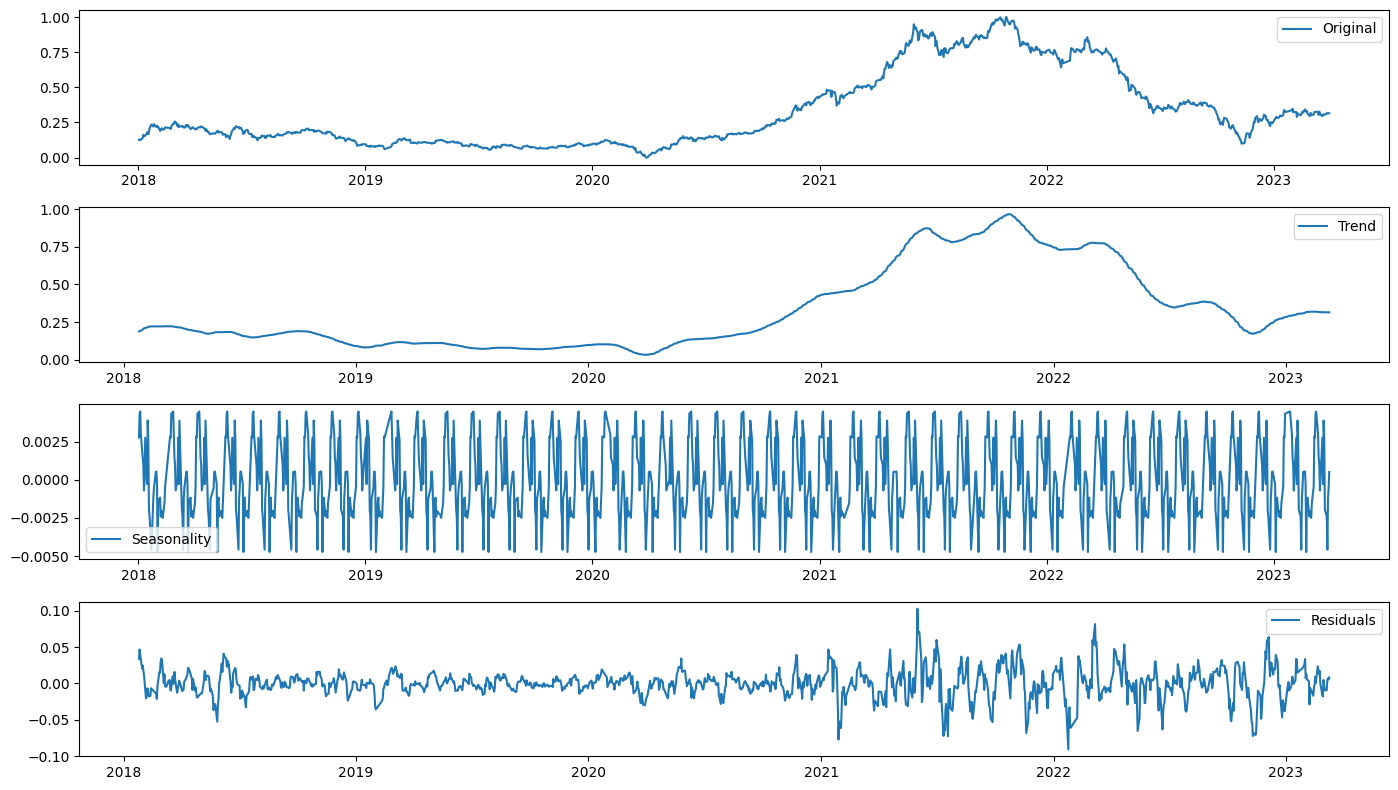

In [17]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
# Phân tích seasonal và trend bằng phương pháp decomposition additive
decomposition = seasonal_decompose(data['Price'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(data['Date'], data['Price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(data['Date'], trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(data['Date'], seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(data['Date'], residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


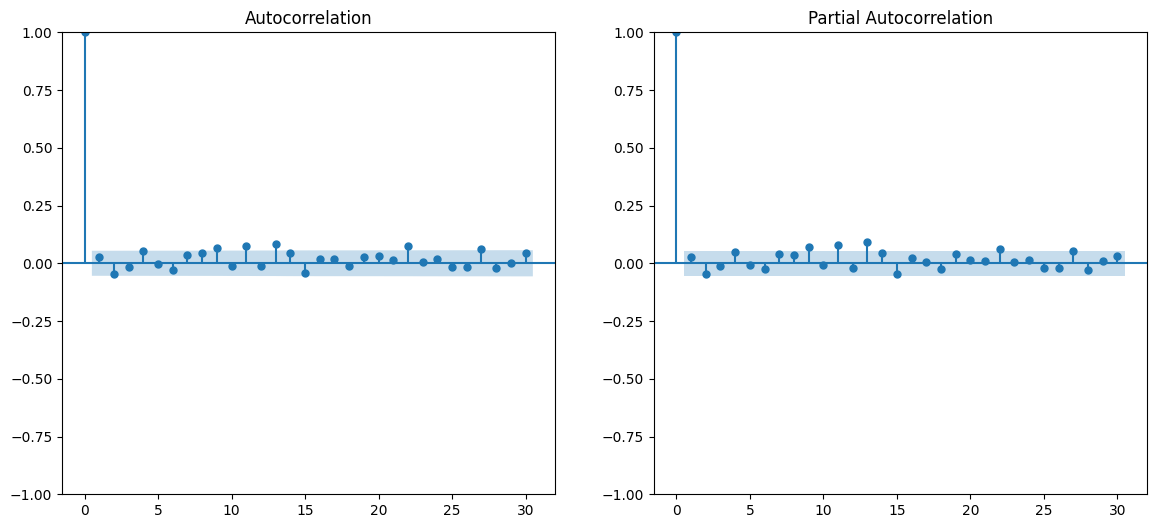

In [18]:

# Vẽ biểu đồ ACF và PACF
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(data['Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(data['Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.show()


In [19]:
# Điền giá trị thiếu bằng phương pháp forward fill
data_interpolated_ffill = data.ffill()

# Điền giá trị thiếu bằng phương pháp backward fill
data_interpolated_bfill = data.bfill()

# Hiển thị dữ liệu thiếu và dữ liệu sau khi điền giá trị
missing_data_ffill = data_interpolated_ffill.isnull().sum()
missing_data_bfill = data_interpolated_bfill.isnull().sum()

missing_data, missing_data_ffill, missing_data_bfill


(Date        0
 Price       0
 Open        0
 High        0
 Low         0
 Vol.        0
 Change %    0
 dtype: int64,
 Date            0
 Price           0
 Open            0
 High            0
 Low             0
 Vol.            0
 Change %        0
 Price_MA30     29
 Price_MA90     89
 Price_STD30    29
 Price_STD90    89
 Price_diff      1
 dtype: int64,
 Date           0
 Price          0
 Open           0
 High           0
 Low            0
 Vol.           0
 Change %       0
 Price_MA30     0
 Price_MA90     0
 Price_STD30    0
 Price_STD90    0
 Price_diff     0
 dtype: int64)

In [20]:
# Chuẩn hóa Z-score
scaler = StandardScaler()
data_scaled_values = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']])
data_scaled = pd.DataFrame(data_scaled_values, columns=['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'])
data_scaled['Date'] = data['Date'].values

# Hiển thị thông tin dữ liệu đã chuẩn hóa
data_scaled_info = data_scaled.info()
data_scaled_head = data_scaled.head()

data_scaled_info, data_scaled_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Price     1308 non-null   float64       
 1   Open      1308 non-null   float64       
 2   High      1308 non-null   float64       
 3   Low       1308 non-null   float64       
 4   Vol.      1308 non-null   float64       
 5   Change %  1308 non-null   float64       
 6   Date      1308 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 71.7 KB


(None,
       Price      Open      High       Low      Vol.  Change %       Date
 0 -0.034785 -0.035944 -0.054597 -0.050329  0.126291 -0.027078 2023-03-31
 1 -0.034785 -0.017384 -0.031726 -0.012698 -0.080159 -0.027078 2023-03-30
 2 -0.034785 -0.045224 -0.036260 -0.017454 -0.300594  0.175141 2023-03-29
 3 -0.044093 -0.026664 -0.045428 -0.017454 -0.712162 -0.229296 2023-03-28
 4 -0.034785 -0.073064 -0.054597 -0.050329 -0.130773  0.798648 2023-03-27)